In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PH, POH 함수 만들기. 입력: 몰농도, 출력: PH/POH

In [3]:
def Ph(h_mollar=10**-7):
    return -np.log10(h_mollar)

def Poh(oh_mollar=10**-7):
    return -np.log10(oh_mollar)

# 산과 염기의 종류와 특성 지정   
# 순서대로 {이름, 이온화될 때 나오는 H+/OH- 이온 수(HCL:1, H2SO4:2, NaOH:1), 몰농도}

In [20]:
acid = {'name':'HCl','coeff':1,'mollar':0.1}
base = {'name':'NaOH','coeff':1,'mollar':0.1}

# 두 용액을 섞었을 때 나타날 결과를 계산할 mix 함수

In [69]:
def mix(acid,base,Vacid=None,Vbase=None):
    #수소이온, 수산화이온 몰수 구하기
    proton = acid['coeff']*acid['mollar']*Vacid
    hydroxide = base['coeff']*base['mollar']*Vbase

    if hydroxide < proton:
        proton -= hydroxide
        hydroxide = 0
        return Ph(h_mollar=proton/(Vacid+Vbase))

    elif hydroxide > proton:
        hydroxide -= proton
        proton = 0
        return 14-Poh(oh_mollar=hydroxide/(Vacid+Vbase))

    elif hydroxide == proton:
        proton = hydroxide = 0
        return 7

# 산에 염기를 0.01ml씩 0 ~ 40ml를 넣었을 때의 PH를 그려보자. 

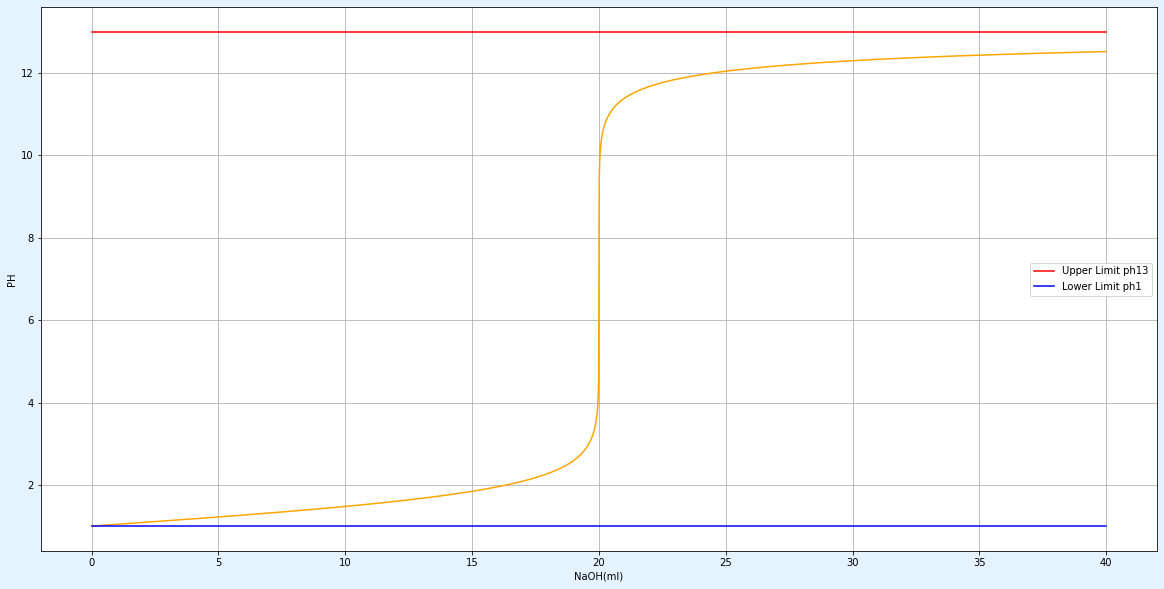

In [85]:
result = np.array([(Vbase,mix(acid,base,Vacid=20,Vbase=Vbase)) for Vbase in np.arange(0,40+0.01,0.01)])

plt.rcParams["figure.figsize"] = (20,10)
plt.figure().patch.set_facecolor('#e5f2ff')
plt.plot(result[:,0],result[:,1],color='orange')
plt.plot((0,40),(13,13),color='red',label='Upper Limit ph13')
plt.plot((0,40),(1,1),color='blue',label='Lower Limit ph1')
plt.grid(True)  
plt.legend(loc='best')
plt.xlabel(base['name']+'(ml)')
plt.ylabel('PH')
plt.show()